# Chapter 8

#### Segmentation

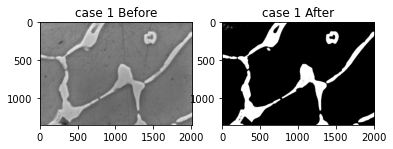

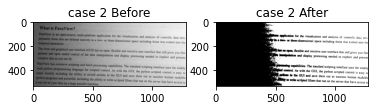

In [2]:
import cv2
import numpy
from PIL import Image 
from skimage.filters.thresholding import threshold_otsu
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale
a = Image.open('../Figures/sem3.png').convert('L')
a = numpy.asarray(a)
thresh = threshold_otsu(a)
# Pixels with intensity greater than the
# "threshold" are kept.
b = 255*(a > thresh)
# Saving the image.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('case 1 Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('case 1 After')
plt.show()

# comment  the scattered electron image of an atomic element in two different phases. We segment the image using Otsu’s method 
# to remove the noise and get a output where foreground is seperated from the background.

# now lest see if it works for every case 
# new image is taken now 
# Opening the image and converting it to grayscale
a = Image.open('../Figures/adaptive_example1.png').convert('L')
a = numpy.asarray(a)
thresh = threshold_otsu(a)
# Pixels with intensity greater than the
# "threshold" are kept.
b = 255*(a > thresh)
# Saving the image.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('case 2 Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('case 2 After')
plt.show()

# due to shadow the output is not good ie this image do not have bi modal histogram so the sigmetation is obtained but not good.

#### Renyi Entropy

The renyi threshold is:  220


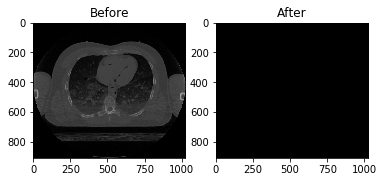

In [8]:
import cv2
from PIL import Image
import numpy as np
import skimage.exposure as imexp
import matplotlib.pyplot as plt

# Defining function
def renyi_seg_fn(im, alpha):
    hist, _ = imexp.histogram(im)
    # Convert all values to float
    hist_float = np.array([float(i) for i in hist])
    # compute the pdf
    pdf = hist_float/np.sum(hist_float)
    # compute the cdf
    cumsum_pdf = np.cumsum(pdf)
    s, e = im.min(), im.max()
    scalar = 1.0/(1.0-alpha)
    # A very small value to prevent error due to log(0).
    eps = np.spacing(1)

    rr = e-s
    # The inner parentheses is needed because
    # the parameters are tuple.
    h1 = np.zeros((rr, 1))
    h2 = np.zeros((rr, 1))
    # The following loop computes h1 and h2
    # values used to compute the entropy.
    for ii in range(1, rr):
        iidash = ii+s
        temp0 = pdf[0:iidash]/(cumsum_pdf[iidash])
        temp1 = np.power(temp0, alpha)
        h1[ii] = np.log(np.sum(temp1)+eps)
        temp0 = pdf[iidash+1:e]/(1.0-cumsum_pdf[iidash])
        temp2 = np.power(temp0, alpha)
        h2[ii] = np.log(np.sum(temp2)+eps)

    T = h1+h2
    # Entropy value is calculated
    T = T*scalar
    T = T.reshape((rr, 1))[:-2]
    # location where the maximum entropy
    # occurs is the threshold for the renyi entropy
    thresh = T.argmax(axis=0)
    return thresh


# Main program
# Opening the image and converting it to grayscale.
a = Image.open('../Figures/CT.png').convert('L')
a = np.array(a)
# Computing the threshold by calling the function.
thresh = renyi_seg_fn(a, 3)
print('The renyi threshold is: ', thresh[0])
b = 255*(a > thresh)
# Saving the image as renyi_output.png
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('After')
plt.show()

#### Adaptive Thresholding

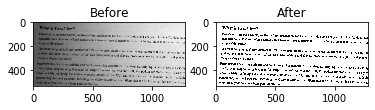

In [9]:
import cv2
import numpy
from PIL import Image
from skimage.filters import threshold_local
import matplotlib.pyplot as plt


# Opening the image and converting it to grayscale.
a = Image.open('../Figures/adaptive_example1.png'). \
	convert('L')
a = numpy.asarray(a)
# Performing adaptive thresholding. 
b = cv2.adaptiveThreshold(a,a.max(),\
	cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,21,10)
# Saving the image as adaptive_output.png 
# in the folder Figures. 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('After')
plt.show()

# In Otsu’s method, a global threshold, might not provide accurate segmentation. Adaptive thresholding helps solve this problem.
# any of the histogram-based segmentation methods can be converted into an adaptive thresholding method.

#### Watershed Segmentation

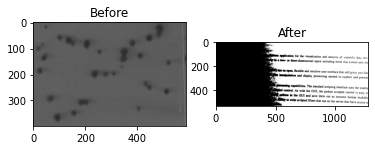

In [3]:
import cv2
from scipy.ndimage import label
import matplotlib.pyplot as plt


# Opening the image.
a = cv2.imread('../Figures/cellimage.png')
# Converting to grayscale.
a1 = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Thresholding the image to obtain cell pixels.
thresh,b1 = cv2.threshold(a1, 0, 255,
            cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# Since Otsu's method has over segmented the image
# erosion operation is performed.
b2 = cv2.erode(b1, None,iterations = 2)
# Distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# Thresholding the distance transform image to obtain 
# pixels that are foreground.
thresh, dt = cv2.threshold(dist_trans, 1, 
             255, cv2.THRESH_BINARY)	
# Performing labeling.
labelled, ncc = label(dt)
# Performing watershed.
cv2.watershed(a, labelled)
# Saving the image as watershed_output.png
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('After')
plt.show()

#### Chan-Vese Segmentation

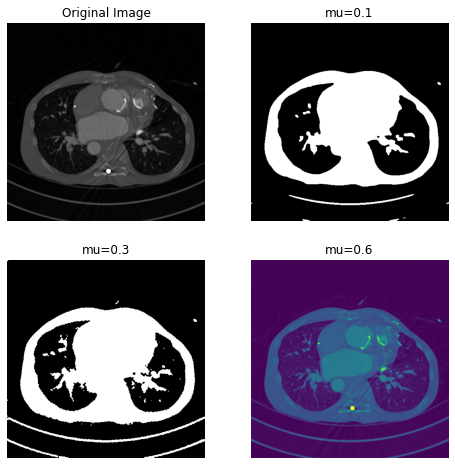

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese
import numpy as np
import matplotlib.pyplot as plt

# Opening the image and converting it into grayscale
img = Image.open('../Figures/imageinverse_input.png').convert('L')
img = np.array(img)

cv1 = chan_vese(img, mu=0.1)
cv2 = chan_vese(img, mu=0.3)
cv3 = chan_vese(img, mu=0.6)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()
ax[0].imshow(img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv1, cmap="gray")
ax[1].set_axis_off()
ax[1].set_title("mu=0.1", fontsize=12)

ax[2].imshow(cv2, cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("mu=0.3", fontsize=12)


ax[3].imshow(cv3, cmap="gray")
ax[3].set_axis_off()
ax[3].set_title("mu=0.6", fontsize=12)
plt.imshow(img)
plt.show()